# Desafío - Regularización
____

Nombre: __Hugo Zúñiga__

Profesor: Josué Fredes

Generación: __G4__

____

* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad. 
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv). 
* Una vez terminado el desafío, comprime la carpeta y sube el .zip a la sección correspondiente.

## Descripción

* En esta ocasión utilizaremos datos de la composición química de muestras de vino.

* Nuestro propósito será tratar de predecir su calidad a partir de su composición química.

* Comience su estudio realizando un breve análisis exploratorio y descriptivo:
    * Identifique el tipo de datos de cada columna.
    * Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.
    * Encuentre la cantidad de valores faltantes en cada columna.
    * Grafique la distribución empírica de cada atributo.
    
____

### Ejercicio 1: Preparación del Ambiente de Trabajo

* Importe las librerías básicas
* Importe los métodos asociados a regularización 
* Importe la base de datos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

import warnings
warnings.filterwarnings(action='ignore')

plt.rcParams["figure.figsize"] = (10, 6) # Tamaño gráficos
plt.rcParams["figure.dpi"] = 80 # resolución gráficos
sn.set_style('darkgrid')

In [3]:
df = pd.read_csv('winequality-red.csv')
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1238            8.1             0.730         0.00             2.5      0.081   
1333            9.1             0.775         0.22             2.2      0.079   
1082            7.2             0.380         0.30             1.8      0.073   
270             7.9             0.545         0.06             4.0      0.087   
679            10.8             0.260         0.45             3.3      0.060   
168             6.8             0.630         0.07             2.1      0.089   
1106            8.2             0.230         0.42             1.9      0.069   
59              7.3             0.390         0.31             2.4      0.074   
1297            7.2             0.530         0.14             2.1      0.064   
841             6.6             0.660         0.00             3.0      0.115   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1238                 12.0                  24.0  0.99798  3.38       0.46   
1333                 12.0                  48.0  0.99760  3.18       0.51   
1082                 31.0                  70.0  0.99685  3.42       0.59   
270                  27.0                  61.0  0.99650  3.36       0.67   
679                  20.0                  49.0  0.99720  3.13       0.54   
168                  11.0                  44.0  0.99530  3.47       0.55   
1106                  9.0                  17.0  0.99376  3.21       0.54   
59                    9.0                  46.0  0.99620  3.41       0.54   
1297                 15.0                  29.0  0.99323  3.35       0.61   
841                  21.0                  31.0  0.99629  3.45       0.63   

      alcohol  quality  
1238      9.6        4  
1333      9.6        5  
1082      9.5        6  
270      10.7        6  
679       9.6        5  
168      10.4        6  
1106     12.3        6  
59        9.4        6  
1297     12.1        6  
841      10.3        5

In [4]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [5]:
df.shape

(1599, 12)

### Ejercicio 2: Análisis exploratorio

* Identifique el tipo de datos de cada columna.
* Identifique outliers univariados y multivariados. Los primeros los puede encontrar realizando boxplots de cada atributo, los segundos estudiando los scatterplot entre pares de atributos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

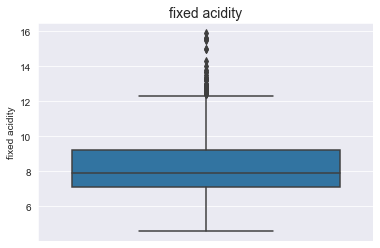

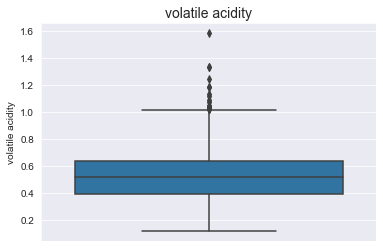

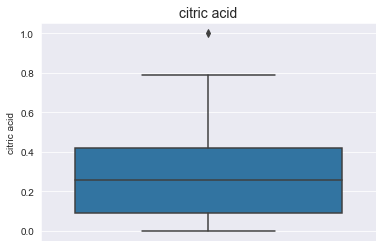

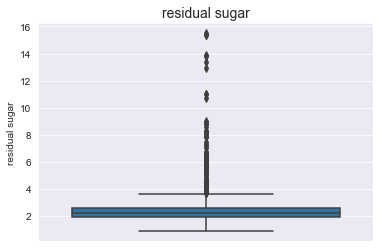

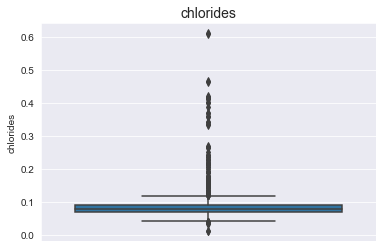

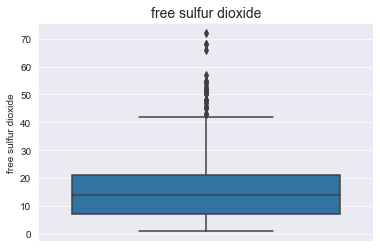

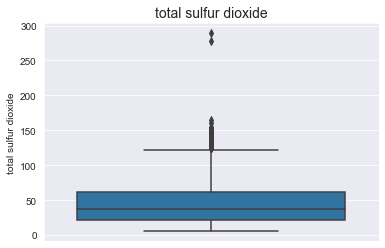

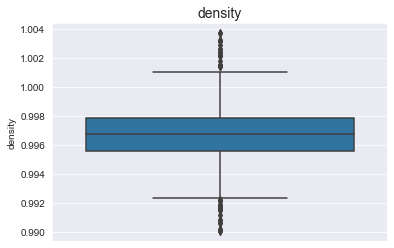

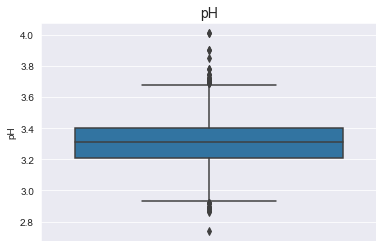

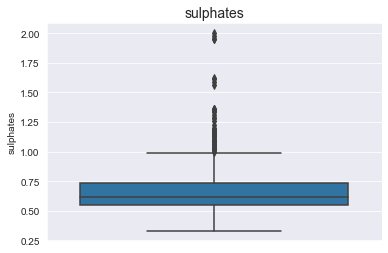

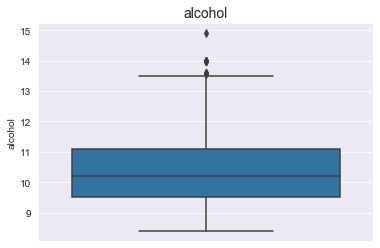

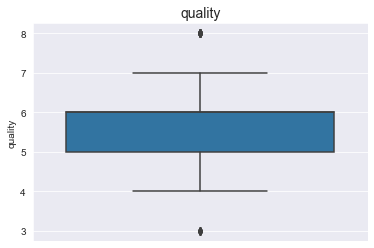

In [8]:
# fixed acidity
for i in df.columns:
    plt.figure()
    sns.boxplot(y=i, data=df).set_title(i, size=14)

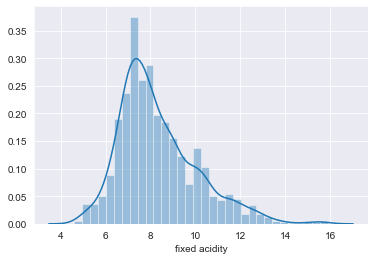

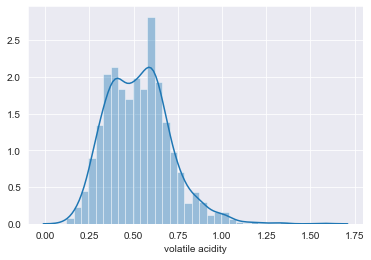

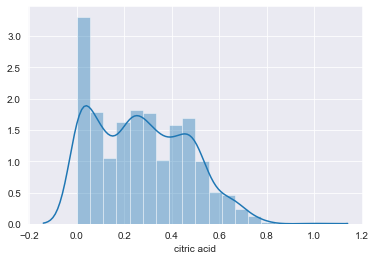

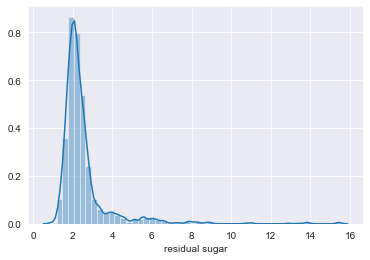

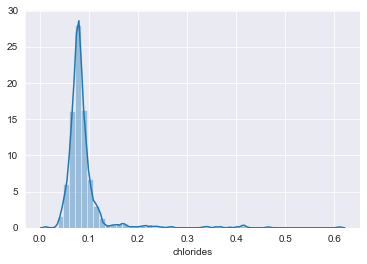

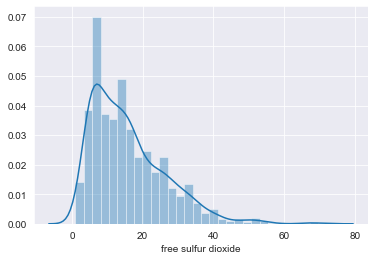

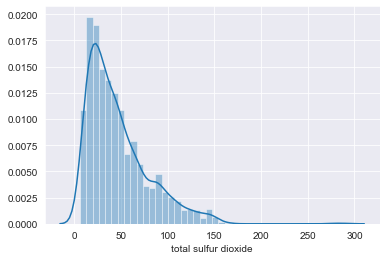

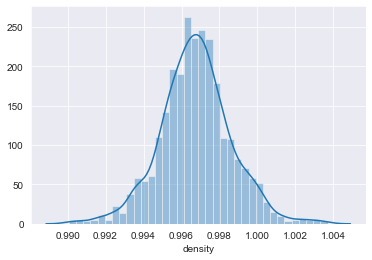

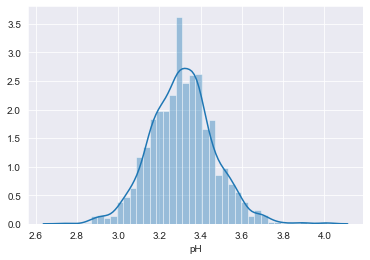

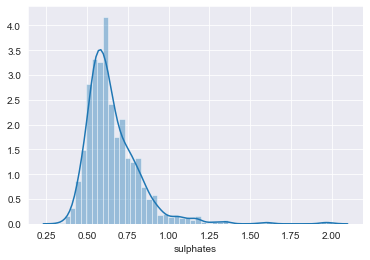

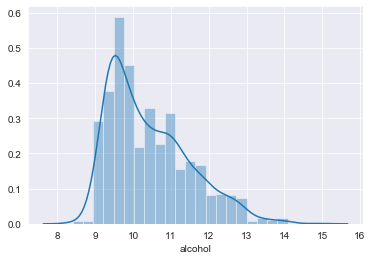

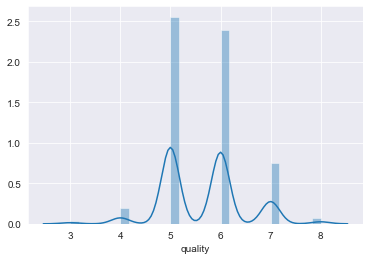

In [9]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i], label=i)

__Comentario:__ Se encuentran outliers univariados en todas las variables, lo que podría signficar que existe algún vino distinto al resto. Sin embargo, se ve fuertemente un outlier en `total sulfur dioxide`.

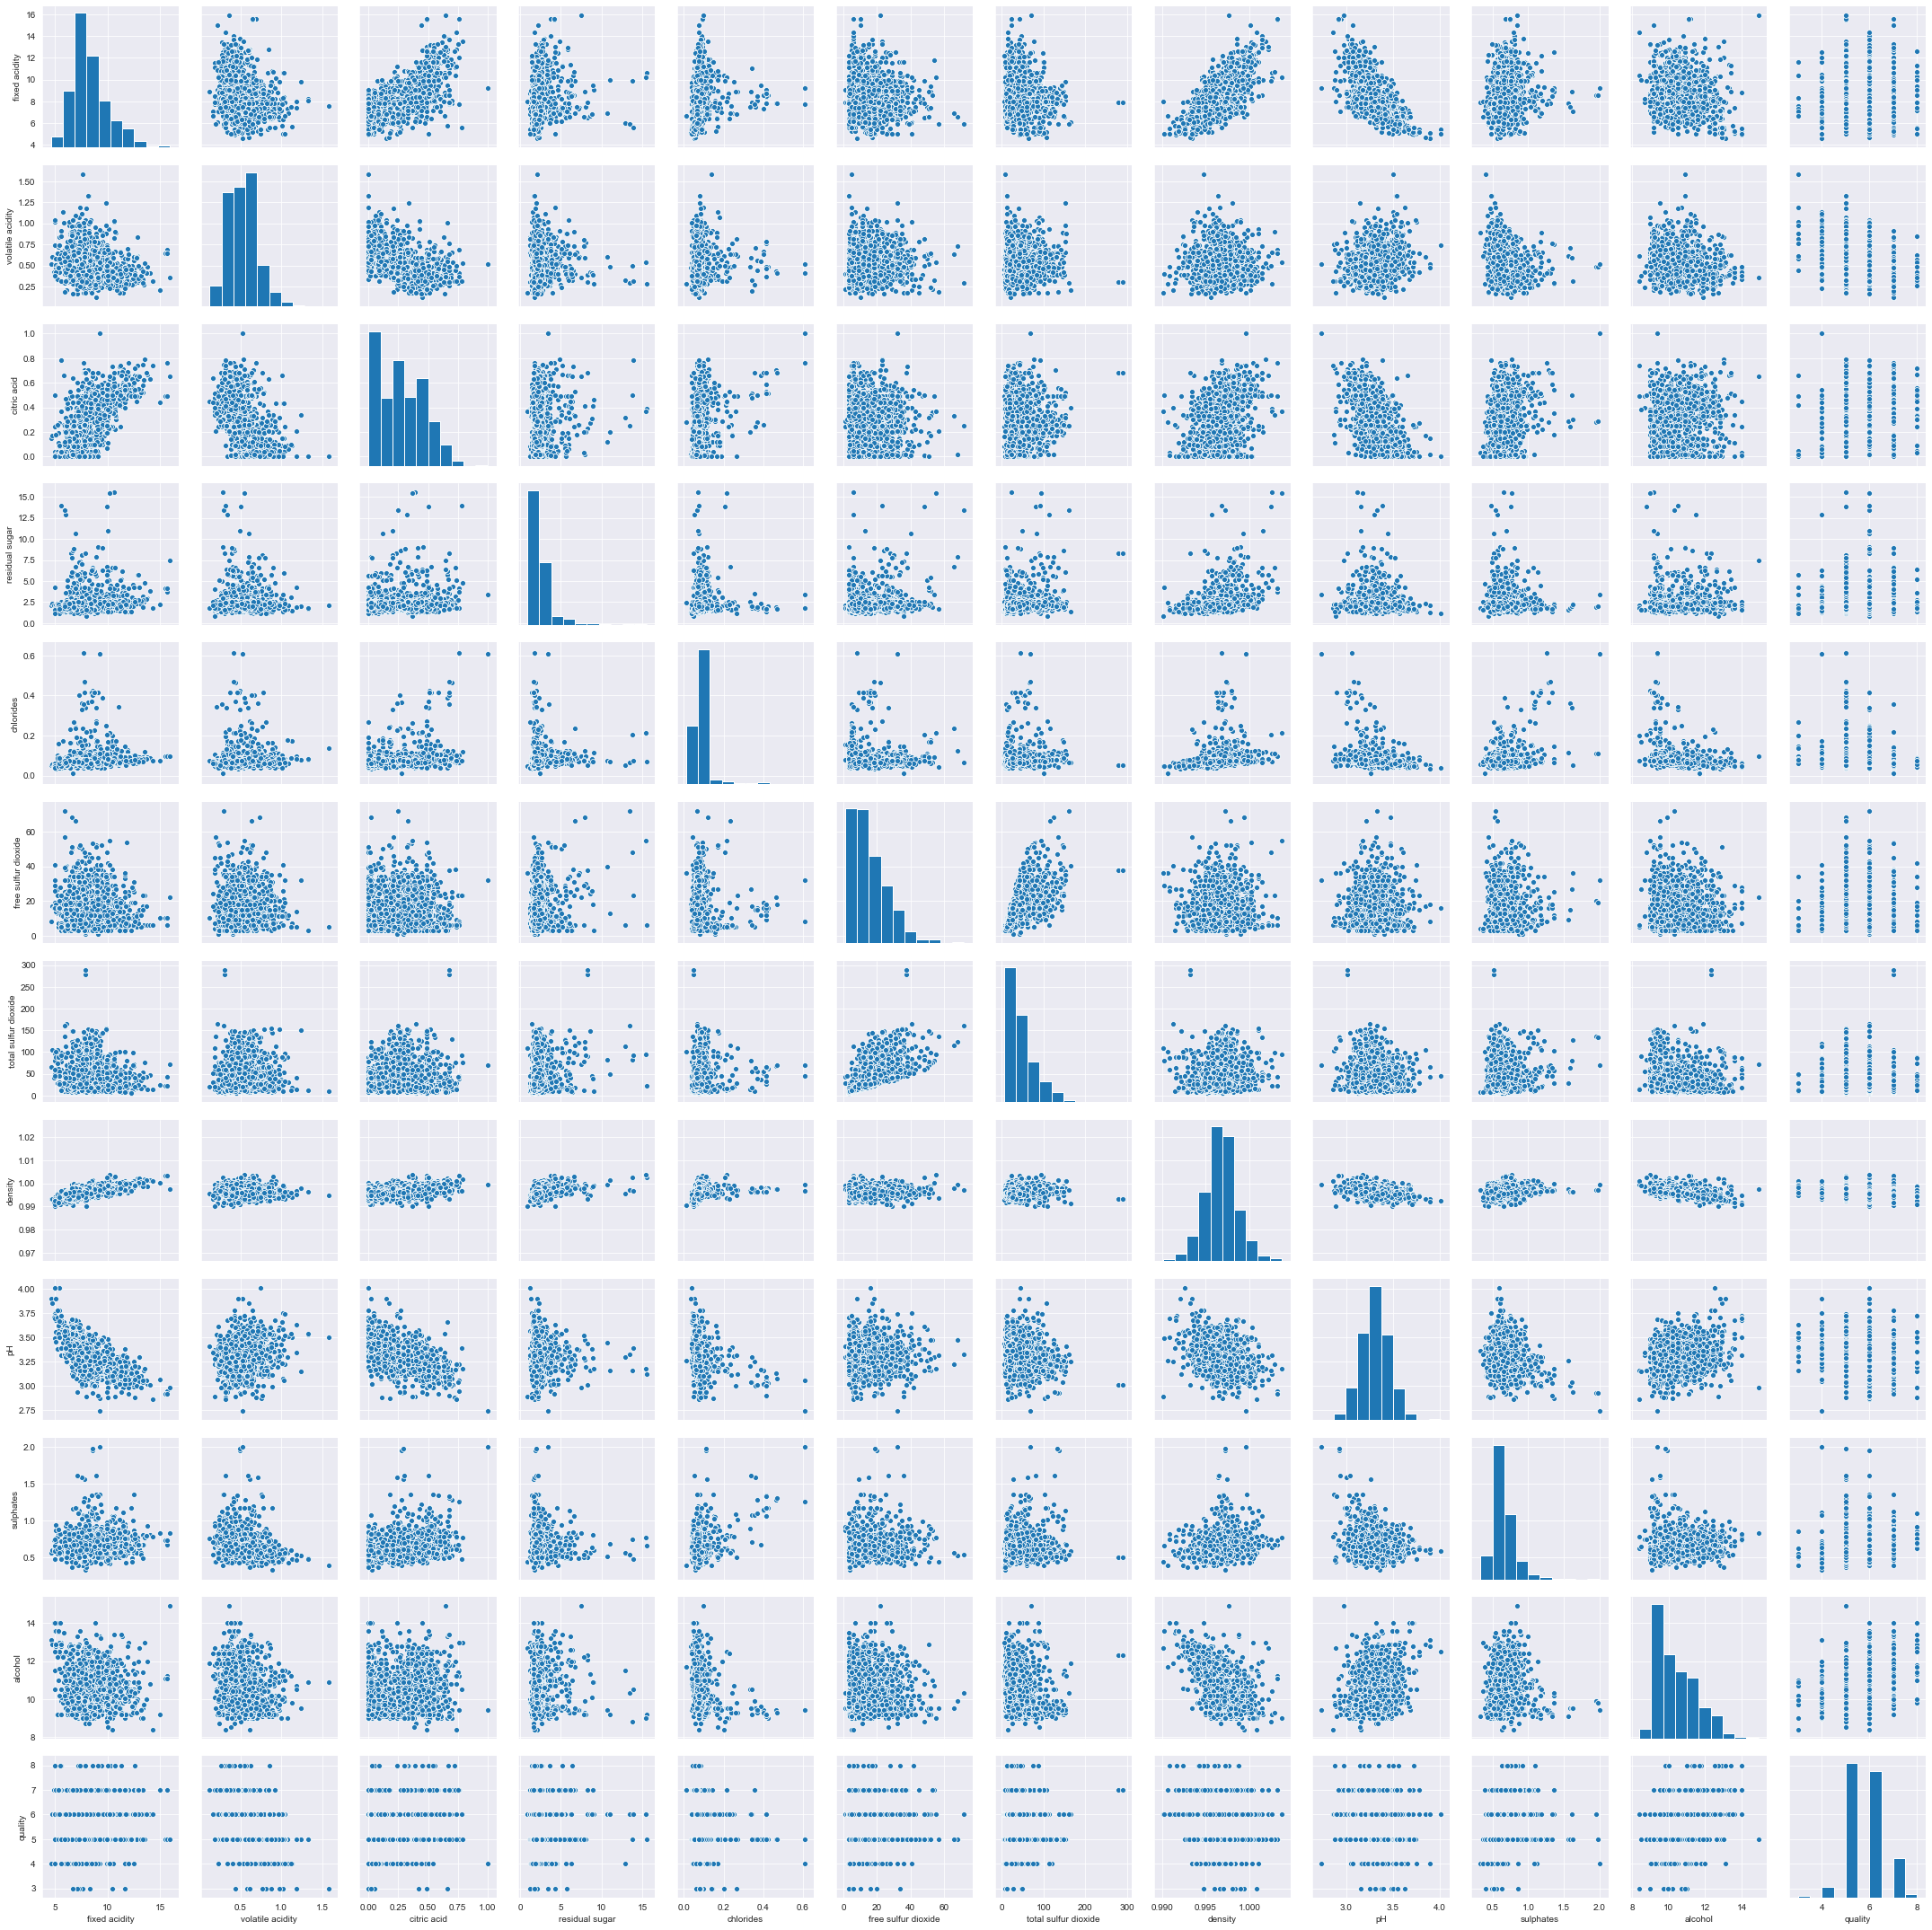

In [10]:
sns.pairplot(data=df)

__Comentarios:__ Se ve que el `total sulfur dioxide` tiene outliers notorios bien marcados con todas las variables. A pesar que existen outliers en todas las variables.

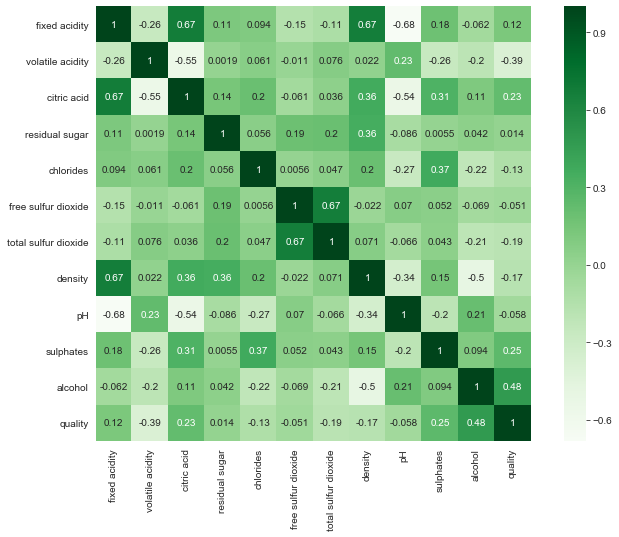

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(), cmap='Greens', annot=True, square=True)

### Ejercicio 3: Regularización de modelos

* Genere tres modelos, correspondientes a `RidgeCV`, `LassoCV` y `ElasticNetCV`. Para cada uno de ellos implemente los siguientes pasos:

    * Entrene los modelos con 10 validaciones cruzadas.
    * Extraiga los coeficientes estimados, el mejor valor alpha, MAE (`median_absolute_error`) y RMSE (`mean_squared_error`) asociado a cada modelo.
    * En base a la información solicitada, responda lo siguiente:
        * ¿Qué modelo presenta un mejor desempeño en base a las métricas?
        * ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?

### Sobre los métodos `RidgeCV`, `LassoCV` y `ElasticNetCV`

* Para implementar la búsqueda de hiperparámetros con validación cruzada, utilizaremos la clase `sklearn.linear_model.{RidgeCV, LassoCV, ElasticNetCV}`.
* Por defecto, la clase necesita de una lista de valores `alphas` que representa el hiperparámetro de validación. Si no se define la lista, el método incorporará un array con valores por defecto. 
* Por defecto la clase tendrá una opción `scoring` que permitirá definir la métrica con la cual se evaluará el mejor hiperparámetro. Para el caso de un problema de regresión, si no se define, la métrica será el error cuadrático promedio negativo (más alto es mejor).
* Una vez entrenado el modelo, se puede reportar el mejor alpha con `modelo_entrenado.alpha_`, el valor de los coeficientes con `modelo_entrenado.coef_` y los valores de la métrica de desempeño con `modelo_entrenado.cv_values_`

In [12]:
# Normalizamos el vector objetivo
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [13]:
# Genero los vectores de entrenamiento
X = df_scaled.loc[:,'fixed acidity':'alcohol'] 
y = df_scaled['quality'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 16254)

In [14]:
# Defino valores para alpha
alphas = np.logspace(-3, 3, base = 10)

In [15]:
# RidgeCV
ridge_cv = RidgeCV(cv = 10, alphas=alphas)
model_ridge = ridge_cv.fit(X_train, y_train)

In [16]:
# LassoCV
lasso_cv = LassoCV(cv = 10, alphas=alphas)
model_lasso = lasso_cv.fit(X_train, y_train)

In [17]:
# ElasticNetCV
elastic_net_cv = ElasticNetCV(cv = 10, alphas=alphas)
model_elastic_net = elastic_net_cv.fit(X_train, y_train)

In [18]:
def report_regularization(model, X_test, y_test):
    print('Valor del parámetro de regularización: {0}'.format(model.alpha_))
    print('Coeficientes finales: \n{0}'.format(model.coef_))
    y_hat =  model.predict(X_test)
    print('R-squared: {0}'.format(r2_score(y_test,y_hat)))
    print('Mean Squared Error: {0}'.format(mean_squared_error(y_test, y_hat)))
    print('Root Mean Squared Error: {0}'.format(np.sqrt(mean_squared_error(y_test, y_hat))))
    print('Median Absolute Error: {0}'.format(median_absolute_error(y_test, y_hat)))

In [19]:
report_regularization(model_ridge, X_test, y_test)

Valor del parámetro de regularización: 59.636233165946365
Coeficientes finales: 
[ 0.02745736 -0.22999755 -0.01902102  0.03957542 -0.09740744  0.05220472
 -0.13944287 -0.03693235 -0.07936429  0.19884011  0.34351014]
R-squared: 0.3562075771658577
Mean Squared Error: 0.6022294609315033
Root Mean Squared Error: 0.7760344457119821
Median Absolute Error: 0.5002371372151169


In [20]:
report_regularization(model_lasso, X_test, y_test)

Valor del parámetro de regularización: 0.009540954763499945
Coeficientes finales: 
[ 0.         -0.23113704 -0.00604257  0.01769563 -0.08921356  0.0401814
 -0.12534912 -0.         -0.07888516  0.18941832  0.372002  ]
R-squared: 0.3550149927388545
Mean Squared Error: 0.6033450526208675
Root Mean Squared Error: 0.7767528903202533
Median Absolute Error: 0.49866948884656814


In [21]:
report_regularization(model_elastic_net, X_test, y_test)

Valor del parámetro de regularización: 0.022229964825261943
Coeficientes finales: 
[ 0.         -0.22832764 -0.          0.01571521 -0.0859661   0.03403061
 -0.11899721 -0.         -0.07210266  0.18502275  0.36688536]
R-squared: 0.354781902035198
Mean Squared Error: 0.6035630950889556
Root Mean Squared Error: 0.7768932327475607
Median Absolute Error: 0.502401116676696


In [22]:
# Genero dataframe con los coeficientes
df_coef = pd.DataFrame({'atributos':X_test.columns,
                       'coef_ridge':model_ridge.coef_,
                       'coef_lasso':model_lasso.coef_,
                       'coef_elastic_net':model_elastic_net.coef_})
df_coef

atributos  coef_ridge  coef_lasso  coef_elastic_net
0          fixed acidity    0.027457    0.000000          0.000000
1       volatile acidity   -0.229998   -0.231137         -0.228328
2            citric acid   -0.019021   -0.006043         -0.000000
3         residual sugar    0.039575    0.017696          0.015715
4              chlorides   -0.097407   -0.089214         -0.085966
5    free sulfur dioxide    0.052205    0.040181          0.034031
6   total sulfur dioxide   -0.139443   -0.125349         -0.118997
7                density   -0.036932   -0.000000         -0.000000
8                     pH   -0.079364   -0.078885         -0.072103
9              sulphates    0.198840    0.189418          0.185023
10               alcohol    0.343510    0.372002          0.366885

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

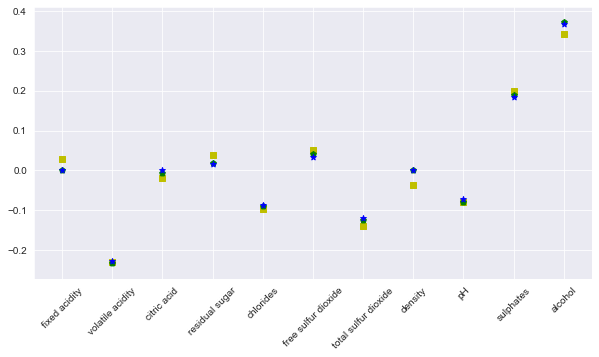

In [40]:
# Graficamos
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_coef['atributos'], df_coef['coef_ridge'], marker='s', color='y')
ax.scatter(df_coef['atributos'], df_coef['coef_lasso'], marker='p', color='g')
ax.scatter(df_coef['atributos'], df_coef['coef_elastic_net'], marker='*', color='b')
plt.xticks(rotation=45)

__* ¿Qué modelo presenta un mejor desempeño en base a las métricas?__

Según los resultados, podemos ver que Ridge tiene un mejor desempeño obteniendo el MSE más bajo. Sin embargo podemos ver que los resultados son muy similares.

__* ¿Qué atributos mantienen un comportamiento similar a lo largo de cada modelo?__

Se puede ver que `volatile acidity` y `pH` presentan un comportamiento similar para cada modelo.